<a href="https://colab.research.google.com/github/varunvenkatsaiis/colab_notebooks/blob/main/cnn_dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow

In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Layer

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz


--2025-03-14 09:13:22--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2025-03-14 09:13:22--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-03-14 09:13:23--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [app

In [ ]:
 !wget http:/ / www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz


--2025-03-14 09:14:39--  ftp://http//
           => ‘.listing’
Resolving http (http)... failed: Name or service not known.
wget: unable to resolve host address ‘http’
/: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2025-03-14 09:14:39--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/annotations.tar.gz [following]
--2025-03-14 09:14:40--  https://thor.robots.ox.ac.uk/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/octet-stream]
Saving to: ‘annotations.tar.gz’

annotations.tar.

In [ ]:
import os

In [ ]:

input_dir = "images/"

In [ ]:

target_dir = "annotations/trimaps"

In [ ]:

target_dir = "annotations/trimaps/"

In [ ]:
!tar -xf images.tar.gz

In [ ]:

!tar -xf annotations.tar.gz

In [ ]:
imput_imgs = sorted(
    [os.path.join(input_dir,fname)  for fname in os.listdir(input_dir) if fname.endswith(".jpg")  ] )



In [ ]:
!cd images

In [ ]:
!ls

annotations  annotations.tar.gz  images  images.tar.gz	sample_data


In [ ]:
cd images/

/content/images


FileNotFoundError: [Errno 2] No such file or directory: 'annotations/trimaps/'

In [ ]:
!cd .

In [ ]:
!cd ../

In [ ]:
! cd ../

In [ ]:
!cd annotations


/bin/bash: line 1: cd: annotations: No such file or directory


In [ ]:
!cd /

In [ ]:
cd ./

/content/images


In [ ]:
cd ./

/content/images


In [ ]:
cd ../

/content


In [ ]:
ls


annotations/  annotations.tar.gz  images/  images.tar.gz  sample_data/


In [ ]:
cd annotations/

/content/annotations


In [ ]:
ls


list.txt  README  test.txt  trainval.txt  trimaps/  xmls/


In [ ]:
target_paths = sorted(  [os.path.join(target_dir , fname )   for fname in os.listdir(target_dir) if fname.endswith(".png") and not fname.startswith(".")  ]  )

FileNotFoundError: [Errno 2] No such file or directory: 'annotations/trimaps/'

In [ ]:
ls

list.txt  README  test.txt  trainval.txt  trimaps/  xmls/


In [ ]:
cd ../

/content


In [ ]:
ls

annotations/  annotations.tar.gz  images/  images.tar.gz  sample_data/


In [ ]:
target_paths = sorted(  [os.path.join(target_dir , fname )   for fname in os.listdir(target_dir) if fname.endswith(".png") and not fname.startswith(".")  ]  )

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import img_to_array , load_img

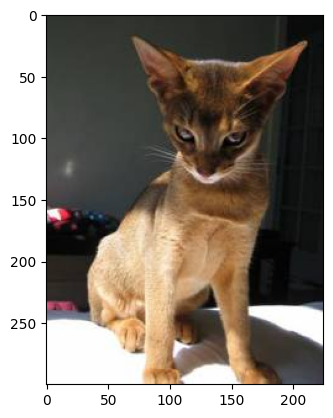

In [ ]:
plt.imshow(load_img(imput_imgs[120] ))

In [ ]:
def display_target(target_array):
  normalized_array = (target_array.astype("uint8") - 1) * 127
  plt.axis("off")
  plt.imshow(normalized_array[ :, :, 0])

In [ ]:

img = img_to_array( load_img(target_paths[120]  ))

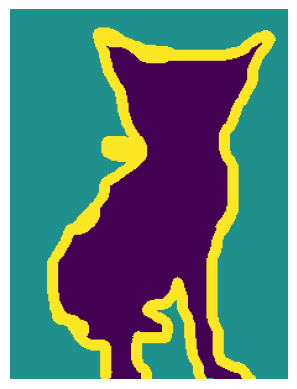

In [ ]:
display_target(img)

In [ ]:
\